# Data Cleaning in Python

This dataset has been taken from NYC Open data source.
Link : https://data.cityofnewyork.us/Business/Inspections/jzhd-m6uv


This data set features DCA inspections during the last and current calendar years, to ensure compliance with local consumer protection and licensing laws, and State and federal regulations.
Target : Based the data set, we are trying to answer below questions -
 
Ques 1. What was the Inspection result for each borough over these 3 years. This is needed to see if there is a particular borough which generally receives bad inspection results.
- We have given a graphical overview of total inspections with inspection results for each borough to answer this. 

Ques 2. What was the Inspection result for each industry type over these 3 years. This is needed to see if there is a particular industry which generally receives bad inspection results.
- We have given a graphical overview of total inspections with inspection results for each industry to answer this. 

Ques 3. What is the trend for Failed & Passed Inspections over these 3 years.
- We have given a graphical overview of 2 kind of inspections - Failed & Passed for each quarter to answer this. 


In [82]:
# First, we will import OS, Numpy, Pandas, Seaborn & matplotlib. 

%matplotlib inline 
import os         
                
import numpy as np
import pandas as pd
import seaborn as sns 
        
import matplotlib.pyplot as plt 

pd.options.display.max_rows = 10
sns.set(style='ticks', context='talk')

In [83]:
# Reading the data available on html & storing it in variable 'tables' 
data = pd.read_csv("C:/Users/mansi/Desktop/Fall Sem/Intro to Data Science/HW6/Inspections.csv")        



# Step 1. Dataframe navigation
It involves seeing head/tail of data, checking column names, information about data, description of statistics for numeric data, shape of data, index information  

In [84]:
data.head()

,Record ID,Certificate Number,Business Name,Inspection Date,Inspection Result,Industry,Borough,Building Number,Street,Street 2,Unit Type,Unit,Description,City,State,Zip,Longitude,Latitude
0,60662-2016-ENFO,09346560,94 D & H PRODUCE INC.,09/14/2016,No Violation Issued,Cigarette Retail Dealer - 127,Manhattan,1821,2ND AVE,NaN,FRNT,1,NaN,NEW YORK,NY,10128.0,-73.947908,40.783137
1,78126-2016-ENFO,03060844,ONE WAY DELI CORP.,12/12/2016,Pass,Grocery-Retail - 808,Manhattan,619,LENOX AVE,NaN,NaN,NaN,NaN,NEW YORK,NY,10037.0,-73.938166,40.817812
2,30123-2016-ENFO,03056722,"GENOVESE DRUG STORES, INC.",05/05/2016,Pass,Drug Store Retail - 810,Brooklyn,6423,FORT HAMILTON PKWY,NaN,NaN,NaN,NaN,BROOKLYN,NY,11219.0,-74.008683,40.630987
3,78072-2016-ENFO,09364759,KINGS DRUG & SURGICAL CORP.,12/08/2016,No Violation Issued,Cigarette Retail Dealer - 127,Brooklyn,492,CLARKSON AVE,NaN,NaN,NaN,NaN,BROOKLYN,NY,11203.0,-73.943092,40.655835
4,77311-2016-ENFO,03058657,"GOLDEN VEGE & GROCERY AT FLATBUSH, INC",12/07/2016,Pass,Grocery-Retail - 808,Brooklyn,1819,FLATBUSH AVE,NaN,NaN,NaN,NaN,BROOKLYN,NY,11210.0,-73.939944,40.625537


In [85]:
data.columns

Index(['Record ID', 'Certificate Number', 'Business Name', 'Inspection Date',
       'Inspection Result', 'Industry', 'Borough', 'Building Number', 'Street',
       'Street 2', 'Unit Type', 'Unit', 'Description', 'City', 'State', 'Zip',
       'Longitude', 'Latitude'],
      dtype='object')

In [86]:
data.shape # tells us about the dimensions of our data. Output means 217427 rows & 18 columns

(217407, 18)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217407 entries, 0 to 217406
Data columns (total 18 columns):
Record ID             217407 non-null object
Certificate Number    217407 non-null object
Business Name         216557 non-null object
Inspection Date       217407 non-null object
Inspection Result     217407 non-null object
Industry              217375 non-null object
Borough               217197 non-null object
Building Number       214205 non-null object
Street                217051 non-null object
Street 2              3195 non-null object
Unit Type             10799 non-null object
Unit                  11462 non-null object
Description           4330 non-null object
City                  217117 non-null object
State                 216881 non-null object
Zip                   217105 non-null float64
Longitude             212501 non-null float64
Latitude              212501 non-null float64
dtypes: float64(3), object(15)
memory usage: 29.9+ MB


In [88]:
data.index

RangeIndex(start=0, stop=217407, step=1)

In [89]:
data.describe() # It gives all the stats for numeric data. However on our dataframe, only Zip, Longitude & Latitude are numeric, so its giving
# their count, mean , max etc.

,Zip,Longitude,Latitude
count,217105.000000,212501.000000,212501.000000
mean,10815.964934,-73.929863,40.725970
std,806.411689,0.076551,0.078956
min,1069.000000,-74.248540,40.507858
25%,10303.000000,-73.981859,40.670824
50%,11205.000000,-73.937026,40.722884
75%,11234.000000,-73.884709,40.775352
max,92130.000000,-73.700723,40.912063


In [90]:
# Assigning all data column names as key for a dictionary which will be used to rename column names of our dataset.
keys = list(data.columns)
print(keys)


['Record ID', 'Certificate Number', 'Business Name', 'Inspection Date', 'Inspection Result', 'Industry', 'Borough', 'Building Number', 'Street', 'Street 2', 'Unit Type', 'Unit', 'Description', 'City', 'State', 'Zip', 'Longitude', 'Latitude']


In [91]:
# Assigning new column names as value for a dictionary which will be used to rename column names of our dataset.
values = ['Recid', 'Certno', 'Businessname', 'Inspdate', 'Result', 'Industry', 'Borough', 
          'Bldgno', 'junk0', 'junk1', 'junk2', 'junk3', 'Description', 'city', 
          'State', 'Zip', 'junk4', 'junk5']
column_names = dict(zip(keys, values)) # Assigning dictionary created in above steps to a variable 'column_names'
data = data.rename(columns=column_names) # Renaming old column names to new column names
data.head()

,Recid,Certno,Businessname,Inspdate,Result,Industry,Borough,Bldgno,junk0,junk1,junk2,junk3,Description,city,State,Zip,junk4,junk5
0,60662-2016-ENFO,09346560,94 D & H PRODUCE INC.,09/14/2016,No Violation Issued,Cigarette Retail Dealer - 127,Manhattan,1821,2ND AVE,NaN,FRNT,1,NaN,NEW YORK,NY,10128.0,-73.947908,40.783137
1,78126-2016-ENFO,03060844,ONE WAY DELI CORP.,12/12/2016,Pass,Grocery-Retail - 808,Manhattan,619,LENOX AVE,NaN,NaN,NaN,NaN,NEW YORK,NY,10037.0,-73.938166,40.817812
2,30123-2016-ENFO,03056722,"GENOVESE DRUG STORES, INC.",05/05/2016,Pass,Drug Store Retail - 810,Brooklyn,6423,FORT HAMILTON PKWY,NaN,NaN,NaN,NaN,BROOKLYN,NY,11219.0,-74.008683,40.630987
3,78072-2016-ENFO,09364759,KINGS DRUG & SURGICAL CORP.,12/08/2016,No Violation Issued,Cigarette Retail Dealer - 127,Brooklyn,492,CLARKSON AVE,NaN,NaN,NaN,NaN,BROOKLYN,NY,11203.0,-73.943092,40.655835
4,77311-2016-ENFO,03058657,"GOLDEN VEGE & GROCERY AT FLATBUSH, INC",12/07/2016,Pass,Grocery-Retail - 808,Brooklyn,1819,FLATBUSH AVE,NaN,NaN,NaN,NaN,BROOKLYN,NY,11210.0,-73.939944,40.625537


In [92]:
# Deleting the column names where column name starts with 'junk' & then the count (0-5)
for idx in range(6):
    column_name = 'junk' + str(idx)
    del data[column_name]
data.head()



,Recid,Certno,Businessname,Inspdate,Result,Industry,Borough,Bldgno,Description,city,State,Zip
0,60662-2016-ENFO,09346560,94 D & H PRODUCE INC.,09/14/2016,No Violation Issued,Cigarette Retail Dealer - 127,Manhattan,1821,NaN,NEW YORK,NY,10128.0
1,78126-2016-ENFO,03060844,ONE WAY DELI CORP.,12/12/2016,Pass,Grocery-Retail - 808,Manhattan,619,NaN,NEW YORK,NY,10037.0
2,30123-2016-ENFO,03056722,"GENOVESE DRUG STORES, INC.",05/05/2016,Pass,Drug Store Retail - 810,Brooklyn,6423,NaN,BROOKLYN,NY,11219.0
3,78072-2016-ENFO,09364759,KINGS DRUG & SURGICAL CORP.,12/08/2016,No Violation Issued,Cigarette Retail Dealer - 127,Brooklyn,492,NaN,BROOKLYN,NY,11203.0
4,77311-2016-ENFO,03058657,"GOLDEN VEGE & GROCERY AT FLATBUSH, INC",12/07/2016,Pass,Grocery-Retail - 808,Brooklyn,1819,NaN,BROOKLYN,NY,11210.0


# Checking unique records to address duplication/style inconsistency in column value

In [93]:
# Checking data types
print(data.dtypes)

Recid            object
Certno           object
Businessname     object
Inspdate         object
Result           object
                 ...   
Bldgno           object
Description      object
city             object
State            object
Zip             float64
Length: 12, dtype: object


In [94]:
# Checking how many record Ids we have.
data['Certno'].value_counts()
# Output indicates that there there are 3 observations with same Certificate number - 03060662 (& similarly others).
#This is an indication of duplication of rows. 


09313706    3
03060662    3
03055507    2
P0055215    2
09348673    2
           ..
05409276    1
03051541    1
03044068    1
03045872    1
05393165    1
Name: Certno, Length: 216755, dtype: int64

In [95]:
# Finding out how many values in 'Certno' column are duplicate. True indicates duplicate, False indicates Not duplicate.
data.duplicated(subset = ['Certno']).value_counts()
# Output indicates that there are 216755 observations which are not duplicated, while 652 observations have duplicate Certifiate numbers.

False    216755
True        652
dtype: int64

In [96]:
# removing duplicate Certificate numbers, with parameter 'first', meaning only 1st instance among duplicated records will be kept.
data1 = data.drop_duplicates(subset='Certno', keep = 'first')

In [97]:
# Check if we still have duplicates
data1.duplicated(subset = ['Certno']).value_counts()
# Output indicates that we dont have any duplicates Certificate number now.


False    216755
dtype: int64

In [98]:
# Check if we have any missing data in Inspection date
data1['Inspdate'].value_counts(dropna = False)

07/02/2015    686
08/12/2016    577
02/05/2016    504
02/22/2017    499
05/20/2016    495
             ... 
06/25/2017      1
09/07/2015      1
11/08/2016      1
07/26/2015      1
07/05/2015      1
Name: Inspdate, Length: 901, dtype: int64

In [99]:
# Checking unique values for column 'Borough'
data1.Borough.unique()

# Output indicates that there are style inconsistencies in Borough values like Brooklyn as well as BROOKLYN

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx',
       'BRONX', 'MANHATTAN', 'Outside NYC', 'QUEENS', nan, 'BROOKLYN'], dtype=object)

In [100]:
# Converting all values in column Borough to lower case, to resolve style inconsistency.
data1['Borough'] = data1['Borough'].str.lower()


C:\Users\mansi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [101]:
# Ensuring if the Borough values dont have any duplication/style inconsistency
data1.Borough.unique()

array(['manhattan', 'brooklyn', 'queens', 'staten island', 'bronx',
       'outside nyc', nan], dtype=object)

In [102]:
# Checking unique values for column 'Result'
data1.Result.unique()

array(['No Violation Issued', 'Pass', 'Out of Business', 'Warning',
       'Violation Issued', 'Fail', 'No Evidence of Activity', 'Closed',
       'Unable to Locate', 'Licensed', 'NOH Withdrawn', 'Re-inspection',
       'Business Padlocked', 'Samples Obtained', 'Completed', 'Condemned',
       'Unable to Complete Inspection', 'Posting Order Served',
       'ECB Warning Issued', 'License Confiscated', 'ECB Summons Issued',
       'Confiscated', 'Unable to Seize Vehicle', 'No Warning Issued'], dtype=object)

In [103]:
# Similarly, we are checking style inconsistency for Inspection date  
data1.Inspdate.unique()

##values = ['Recid', 'Certno', 'Businessname', 'Inspdate', 'Result', 'Industry', 'Borough', 
 #         'Bldgno', 'Description', 'city', 'State', 'Zip' ]

array(['09/14/2016', '12/12/2016', '05/05/2016', '12/08/2016',
       '12/07/2016', '08/30/2016', '09/22/2016', '09/21/2016',
       '09/09/2016', '09/24/2016', '09/27/2016', '04/27/2016',
       '05/07/2016', '09/26/2016', '01/20/2016', '05/08/2016',
       '09/25/2016', '09/23/2016', '01/11/2016', '04/30/2016',
       '01/12/2016', '06/02/2016', '12/13/2016', '12/09/2016',
       '06/24/2016', '04/13/2016', '08/09/2016', '12/11/2016',
       '04/08/2016', '06/14/2016', '08/31/2016', '02/26/2016',
       '04/14/2016', '05/12/2016', '02/19/2016', '03/26/2016',
       '06/17/2016', '06/20/2016', '04/06/2016', '05/15/2016',
       '05/26/2016', '08/22/2016', '07/11/2016', '05/20/2016',
       '07/18/2016', '07/15/2016', '08/05/2016', '08/10/2016',
       '12/10/2016', '05/10/2016', '04/15/2016', '09/01/2016',
       '08/02/2016', '02/08/2016', '03/09/2016', '08/06/2016',
       '07/20/2016', '02/24/2016', '01/14/2016', '08/16/2016',
       '07/28/2016', '05/09/2016', '02/10/2016', '06/15

In [104]:
# We noticed that city values are not consistent. Hence, converting city values into lower case, to address style inconsistency. 
data1 ['city'] = data1['city'].str.lower()


C:\Users\mansi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Checking missing values & Imputation for those

In [105]:
# Checking the count of missing values in each column
data1.isnull().sum()

Recid                0
Certno               0
Businessname       848
Inspdate             0
Result               0
                 ...  
Bldgno            3186
Description     212443
city               289
State              524
Zip                301
Length: 12, dtype: int64

In [106]:
# Filling blanks with "Others" in Industry column.
data1['Industry'] = data1['Industry'].fillna('Others')


C:\Users\mansi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [107]:
# Checking if any column value is blank in column 'Industry'
data1['Industry'].isnull().sum()

0

In [108]:
# Checking value counts of each Industry. 
data1['Industry'].value_counts()

Cigarette Retail Dealer - 127                57399
Grocery-Retail - 808                         36222
Misc Non-Food Retail - 817                   19304
Salons And Barbershop - 841                  12332
Secondhand Dealer [General] - 006             7691
                                             ...  
Games Of Chance - 088                            2
Bingo Game Operator - 089                        1
Booting Company - 126                            1
Imitation Gun - 836                              1
Dealer in Products for the Disabled - 119        1
Name: Industry, Length: 93, dtype: int64

In [109]:
# Checking mising value counts of 'Borough.'

data1['Borough'].isnull().sum()
# We have 209 blanks for Borough information. 

209

In [110]:
#Now we will first try to impute borough values from the 'city' column.
#This step is like an excel vlookup, Filling blank values in Column 'Borough' with corresponding values from column 'City',
# if City values are not blank. 
data1.Borough.fillna(data1.city, inplace=True)


C:\Users\mansi\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [111]:
# Values we filled from Column 'City' are assigned to borough name based the geographic information. 
data1.loc[data1['Borough'] == "secaucus", 'Borough'] = "outside nyc"
data1.loc[data1['Borough'] == "walden", 'Borough'] = "outside nyc"
data1.loc[data1['Borough'] == "jamaica", 'Borough'] = "queens"
data1.loc[data1['Borough'] == "new york", 'Borough'] = "manhattan"


C:\Users\mansi\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [112]:
data1['Borough'].isnull().sum()
# With the above 2 steps, we were only able to fill 27 blanks. Still Borough information missing for 182 observations.
# We will try to impute these values in next step.

182

In [113]:
# Defining a function 'maxVal' where we are calculating the maximum frequency of borough for each industry.
# This step is done to impute missing borough values, with that borough value, which has maximum frequency
# We will use Industry as a basis, for using the corresponding mode value of borough.

# For eg, if we will see output, we know that if the industry type is 'Cigareete retail Dealer - 127' & its borough value
# is missing, we will impute it with 'Brooklyn' as that has the maximum frequency.

def maxVal(df, key_cols, value_col, count_col):
     return df.groupby(key_cols + [value_col]).size() \
             .to_frame(count_col).reset_index() \
             .sort_values(count_col, ascending=False) \
             .drop_duplicates(subset=key_cols)

data2 = maxVal(data1, ['Industry'], 'Borough', 'count') 
data2 

,Industry,Borough,count
46,Cigarette Retail Dealer - 127,brooklyn,17894
146,Grocery-Retail - 808,brooklyn,12963
220,Misc Non-Food Retail - 817,brooklyn,6600
282,Salons And Barbershop - 841,brooklyn,4212
374,Wearing Apparel - 450,brooklyn,2540
...,...,...,...
35,Cabaret - 073,bronx,1
38,Car Wash,queens,1
327,Spray Paint Sls Mnor - 832,queens,1
60,Dealer in Products for the Disabled - 119,brooklyn,1


In [114]:
# Setting Industry as index for new dataset 'data2'
data2.set_index('Industry', inplace=True)

# Adding new column 'dept' in old dataset 'data1', looking up maximum values from 'Borough' column of data2.

data1['dept']=data1.Industry.map(data2.Borough)
data1.head()


C:\Users\mansi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Recid,Certno,Businessname,Inspdate,Result,Industry,Borough,Bldgno,Description,city,State,Zip,dept
0,60662-2016-ENFO,09346560,94 D & H PRODUCE INC.,09/14/2016,No Violation Issued,Cigarette Retail Dealer - 127,manhattan,1821,NaN,new york,NY,10128.0,brooklyn
1,78126-2016-ENFO,03060844,ONE WAY DELI CORP.,12/12/2016,Pass,Grocery-Retail - 808,manhattan,619,NaN,new york,NY,10037.0,brooklyn
2,30123-2016-ENFO,03056722,"GENOVESE DRUG STORES, INC.",05/05/2016,Pass,Drug Store Retail - 810,brooklyn,6423,NaN,brooklyn,NY,11219.0,brooklyn
3,78072-2016-ENFO,09364759,KINGS DRUG & SURGICAL CORP.,12/08/2016,No Violation Issued,Cigarette Retail Dealer - 127,brooklyn,492,NaN,brooklyn,NY,11203.0,brooklyn
4,77311-2016-ENFO,03058657,"GOLDEN VEGE & GROCERY AT FLATBUSH, INC",12/07/2016,Pass,Grocery-Retail - 808,brooklyn,1819,NaN,brooklyn,NY,11210.0,brooklyn


In [115]:
# Listing NaN values in Borough column in data1.
data1[pd.isnull(data1['Borough'])]

,Recid,Certno,Businessname,Inspdate,Result,Industry,Borough,Bldgno,Description,city,State,Zip,dept
370,6568-UNIT,09365530,"SKYLINE TOURS, LLC",12/08/2016,Pass,Sightseeing Bus - 078,NaN,NaN,NaN,NaN,NaN,NaN,brooklyn
400,7077-UNIT,09365551,"SKYLINE TOURS, LLC",12/08/2016,Pass,Sightseeing Bus - 078,NaN,NaN,NaN,NaN,NaN,NaN,brooklyn
962,6566-UNIT,09365514,"SKYLINE TOURS, LLC",12/08/2016,Pass,Sightseeing Bus - 078,NaN,NaN,NaN,NaN,NaN,NaN,brooklyn
2312,6567-UNIT,09365531,"SKYLINE TOURS, LLC",12/08/2016,Pass,Sightseeing Bus - 078,NaN,NaN,NaN,NaN,NaN,NaN,brooklyn
3597,6570-UNIT,09365523,"SKYLINE TOURS, LLC",12/08/2016,Pass,Sightseeing Bus - 078,NaN,NaN,NaN,NaN,NaN,NaN,brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204432,13-2014-UNIT,10006754,NaN,05/03/2016,Pass,Tow Truck Company - 124,NaN,NaN,NaN,NaN,NaN,NaN,queens
205698,6566-UNIT,09350819,"SKYLINE TOURS, LLC",08/02/2016,Pass,Sightseeing Bus - 078,NaN,NaN,NaN,NaN,NaN,NaN,brooklyn
208781,5136-UNIT,10006712,K & J'S TOWING INC,04/30/2016,Pass,Tow Truck Company - 124,NaN,NaN,NaN,NaN,NaN,NaN,queens
209760,6567-UNIT,09350842,"SKYLINE TOURS, LLC",08/02/2016,Re-inspection,Sightseeing Bus - 078,NaN,NaN,NaN,NaN,NaN,NaN,brooklyn


In [116]:
# Filling missing values in data1's column 'Borough' by looking up data1's column 'dept'.
data1.Borough.fillna(data1.dept, inplace=True)

# Checking if there are still any missing values in Borough column. 
data1[pd.isnull(data1['Borough'])]

# Output indicates no blank values.

C:\Users\mansi\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Recid,Certno,Businessname,Inspdate,Result,Industry,Borough,Bldgno,Description,city,State,Zip,dept


In [117]:
# Ensuring if all missing values are imputed. 
data1['Borough'].value_counts()
# Output indicates we have filled remaining 183 missing values as well.

brooklyn         68947
manhattan        53088
queens           53020
bronx            32729
staten island     8183
outside nyc        788
Name: Borough, dtype: int64

In [118]:
# Deleting columns which we will not need for our analysis.
del data1['dept']
del data1['Bldgno']
del data1['Description']
del data1['Businessname']

In [119]:
# Checking how our dataset looks now.
data1.head()

,Recid,Certno,Inspdate,Result,Industry,Borough,city,State,Zip
0,60662-2016-ENFO,09346560,09/14/2016,No Violation Issued,Cigarette Retail Dealer - 127,manhattan,new york,NY,10128.0
1,78126-2016-ENFO,03060844,12/12/2016,Pass,Grocery-Retail - 808,manhattan,new york,NY,10037.0
2,30123-2016-ENFO,03056722,05/05/2016,Pass,Drug Store Retail - 810,brooklyn,brooklyn,NY,11219.0
3,78072-2016-ENFO,09364759,12/08/2016,No Violation Issued,Cigarette Retail Dealer - 127,brooklyn,brooklyn,NY,11203.0
4,77311-2016-ENFO,03058657,12/07/2016,Pass,Grocery-Retail - 808,brooklyn,brooklyn,NY,11210.0


In [120]:
# Defining a dictionary for 24 inspection types. By this step, we are categorizing 24 inspection types into broad 
# category of 5 inspections.

di={"No Violation Issued": "Passed_Inspection", "Pass": "Passed_Inspection", "No Evidence of Activity": "Passed_Inspection", "Licensed": "Passed_Inspection","NOH Withdrawn": "Passed_Inspection",
    "Violation Issued": "Failed_Inspection", "Fail": "Failed_Inspection", "License Confiscated": "Failed_Inspection", "ECB Summons Issued": "Failed_Inspection","Confiscated": "Failed_Inspection",
    "Warning": "Warning_Issued", "Re-inspection": "Warning_Issued", "Condemned": "Warning_Issued", "Posting Order Served": "Warning_Issued","ECB Warning Issued": "Warning_Issued", 
    "Samples Obtained": "Inspection_in_progress", "Completed": "Inspection_in_progress", "No Warning Issued": "Inspection_in_progress",
    "Out of Business": "Inspection_on_hold", "Closed": "Inspection_on_hold", "Unable to Locate": "Inspection_on_hold", "Business Padlocked": "Inspection_on_hold", "Unable to Complete Inspection": "Inspection_on_hold", "Unable to Seize Vehicle": "Inspection_on_hold"
   }

data3=data1 # Assigning our dataset to new variable 'data3'



In [121]:
# Applying dictionary defined in above step to data3.
data3 = data3.replace({"Result": di}) 

In [122]:
data3.head()
# Output indicates that now our Inspection result in column 'Result' has been changed to keys defined in dictionary.

,Recid,Certno,Inspdate,Result,Industry,Borough,city,State,Zip
0,60662-2016-ENFO,09346560,09/14/2016,Passed_Inspection,Cigarette Retail Dealer - 127,manhattan,new york,NY,10128.0
1,78126-2016-ENFO,03060844,12/12/2016,Passed_Inspection,Grocery-Retail - 808,manhattan,new york,NY,10037.0
2,30123-2016-ENFO,03056722,05/05/2016,Passed_Inspection,Drug Store Retail - 810,brooklyn,brooklyn,NY,11219.0
3,78072-2016-ENFO,09364759,12/08/2016,Passed_Inspection,Cigarette Retail Dealer - 127,brooklyn,brooklyn,NY,11203.0
4,77311-2016-ENFO,03058657,12/07/2016,Passed_Inspection,Grocery-Retail - 808,brooklyn,brooklyn,NY,11210.0


In [123]:
# Defining a dictionary for 91 industry types. By this step, we are categorizing 91 industry types into broad 
# category of 12 industries.

data3["Industry"]=data3["Industry"].replace(['Secondhand Dealer [General] - 006','Fuel Oil Dealer - 814','Gas Station-Retail - 815','Secondhand Dealer Auto - 005','Garage - 049','Parking Lot - 050','Horse Drawn Cab Owner - 087','Garage & Parking Lot - 098','Auto Rental - 213','Gasoline Truck-Retail - 822','Pedicab Driver - 131','Secondhand Dealer - Firearm - 006A','Car Wash'],'Auto')
data3["Industry"]=data3["Industry"].replace(['Tax Preparers - 891','Tenant Screening - 480','Dealer In Products For The Disabled - 119','Immigration Svc Prv - 893','Gov\'T Agency Retail - 824','Auctioneer - 036','Employment Agency - 034','Debt Collection Agency - 122','Distress Prop Consultants - 247'],'Consultancy and Advisory Services')
data3["Industry"]=data3["Industry"].replace(['Pedicab Business - 130','Sightseeing Bus - 078','Amusement Arcade - 014','Gaming Cafe - 129','Commercial Lessor (Bingo/Games Of Chance) - 091','Pool Or Billiard Room - 046','Motion Picture Operator - 123','Hotel/Motel - 460','Travel Agency - 440','Amusement Device (Portable) - 018','Amusement Device (Permanent) - 016','Temporary Street Fair Vendor Permit - 111','Amusement Device (Temporary) - 090','Cabaret - 073','Photography Services - 415','Horse Drawn Cab Driver - 086','Health Spa - 839','Bingo Game Operator - 089','Games Of Chance - 088'],'Entertainment')
data3["Industry"]=data3["Industry"].replace(['Electronic Store - 001','Hardware-Retail - 811','Furniture Sales - 242','Home Improvement Contractor - 100','Air Condtioning Law - 899','Electronic & Home Appliance Service Dealer - 115','Floor Coverings - 241','Spray Paint Sls Mnor - 832','Scale Dealer/Repairer - 107','Laser Pointer Sales - 834','Appliances - 244','Home Improvement Salesperson - 101'],'Home Appliances and Improvement')
data3["Industry"]=data3["Industry"].replace(['Laundry Jobber - 066','Laundry - 064','Dry Cleaners - 230','Laundries'],'Laundry/Dry-cleaning service')
data3["Industry"]=data3["Industry"].replace(['Other','Tow Truck Driver - 125','Tow Truck Company - 124','Mini-Storage Company - 830','Storage Warehouse - 120','Booting Company - 126','Others','Scrap Metal Processor - 118','Locksmith - 062','Funeral Homes - 888','Mailorder Misc - 319','Dealer in Products for the Disabled - 119'],'Miscellaneous')
data3["Industry"]=data3["Industry"].replace(['Salons And Barbershop - 841','Wearing Apparel - 450'],'Personal Grooming')
data3["Industry"]=data3["Industry"].replace(['Sidewalk Cafe - 013','Mobile Food Vendor - 881','Restaurant - 818','Catering Establishment - 075'],'Restaurants and Cafes')
data3["Industry"]=data3["Industry"].replace(['Grocery-Retail - 808','Drug Store Retail - 810','Supermarket - 819','Misc Non-Food Retail - 817','Retail Store - 820','Megastore - 821','Wholesale Food Market - 718'],'Retail-Household Goods')
data3["Industry"]=data3["Industry"].replace(['Stoop Line Stand - 033','Newsstand - 024','General Vendor - 094','General Vendor Distribution - 097'],'Sidewalk business')
data3["Industry"]=data3["Industry"].replace(['Auction House - 128','Jewelry Store-Retail - 823','Pawnbroker - 080','Special Sale - 102','Imitation Gun - 836'],'Speciality Stores')
data3["Industry"]=data3["Industry"].replace(['Cigarette Retail Dealer - 127','Tobacco Prod\'T Sales - 890'],'Tobacco')

data3.head()

# There can be a more efficient way of doing this, by defining dictionary in csv file & then merging it with out current file.
# We have not explored merge function in this tutorial, thus, have defined dictionary over here itself.


,Recid,Certno,Inspdate,Result,Industry,Borough,city,State,Zip
0,60662-2016-ENFO,09346560,09/14/2016,Passed_Inspection,Tobacco,manhattan,new york,NY,10128.0
1,78126-2016-ENFO,03060844,12/12/2016,Passed_Inspection,Retail-Household Goods,manhattan,new york,NY,10037.0
2,30123-2016-ENFO,03056722,05/05/2016,Passed_Inspection,Retail-Household Goods,brooklyn,brooklyn,NY,11219.0
3,78072-2016-ENFO,09364759,12/08/2016,Passed_Inspection,Tobacco,brooklyn,brooklyn,NY,11203.0
4,77311-2016-ENFO,03058657,12/07/2016,Passed_Inspection,Retail-Household Goods,brooklyn,brooklyn,NY,11210.0


# Graphical presentation of our data to answer questions posted in the beginning

In [124]:
# Grouping total number of inspections by Borough for each category of inspection. We have assigned this dataframe to data4
data4 = data3.groupby(['Borough', 'Result']).size().unstack(fill_value=0)
data4


Result,Failed_Inspection,Inspection_in_progress,Inspection_on_hold,Passed_Inspection,Warning_Issued
Borough,,,,,
bronx,6657,29,3760,21680,603
brooklyn,14201,88,7809,45920,929
manhattan,10798,46,6341,34787,1116
outside nyc,283,0,0,505,0
queens,8881,54,4894,38567,624
staten island,1600,8,680,5796,99


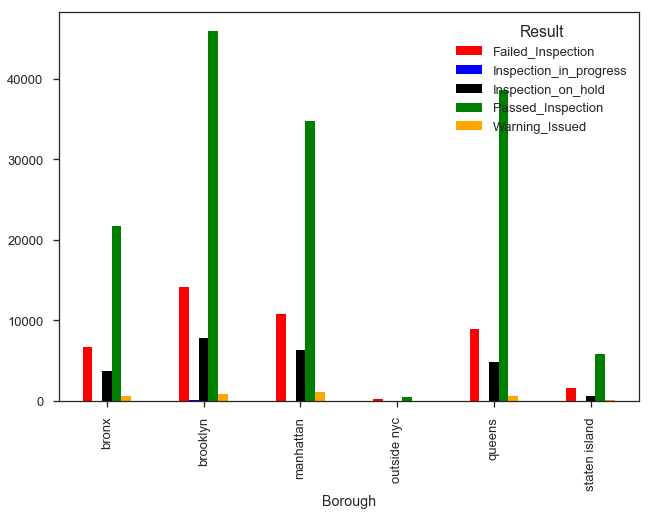

In [125]:
# Plotting the grouped by data stored in data4.
data4.plot( kind='bar', color=['r', 'b', 'k', 'g', 'orange']) 


Interpretation of above chart (based upon data4)

- Output indicates Brooklyn as a borough has maximum number of Passed as well as Failed Inspections. This can be due to the fact that Brooklyn has overall highest number of inspections conducted.
- Queens & Manhattan have almost equivalent number of total inspections. However, Queens have higher number of passed inspections as compared to manhattan.

In [126]:
# Grouping total number of inspections by Industry type for each category of inspection. We have assigned this dataframe to data5
data5 = data3.groupby(['Industry', 'Result']).size().unstack(fill_value=0)
data5

Result,Failed_Inspection,Inspection_in_progress,Inspection_on_hold,Passed_Inspection,Warning_Issued
Industry,,,,,
Auto,4725,92,1526,12996,575
Consultancy and Advisory Services,685,0,833,2501,44
Entertainment,285,25,45,4317,178
Home Appliances and Improvement,2621,17,1583,10401,829
Laundry/Dry-cleaning service,1363,1,492,8213,315
...,...,...,...,...,...
Restaurants and Cafes,1209,1,407,3760,124
Retail-Household Goods,16297,5,7787,41909,446
Sidewalk business,2312,7,351,3468,91


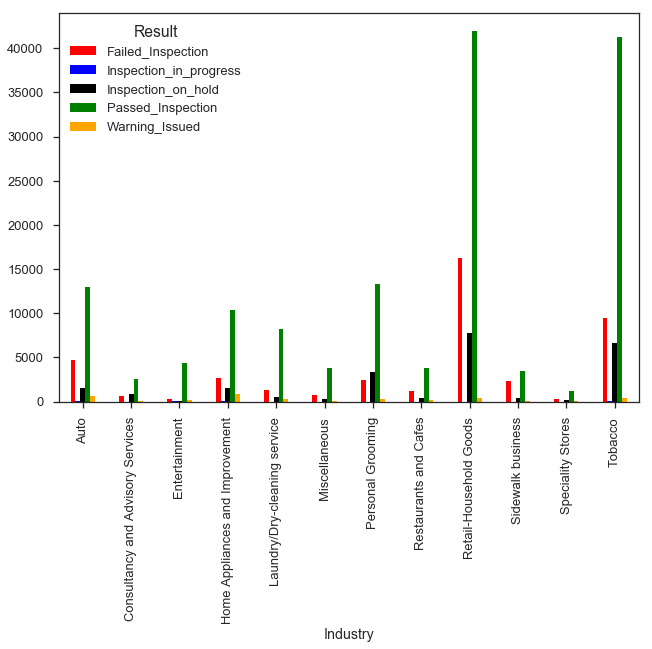

In [127]:
# Plotting the grouped by data stored in data5.
data5.plot( kind='bar', color=['r', 'b', 'k', 'g', 'orange']) 


Interpretation of above chart (based upon data5)

- Output indicates Retail household goods & Tobacco have maximum number of Passed as well as Failed Inspections. 
- Retail - household goods have a higher number of failed inspections as compared to Tobacco industry.

In [128]:
# Adding year & quarter column in our dataset data3, based the inspection date column. 
data3['year'] = pd.DatetimeIndex(data3['Inspdate']).year
data3['quarter'] = pd.DatetimeIndex(data3['Inspdate']).quarter

data3.head()


,Recid,Certno,Inspdate,Result,Industry,Borough,city,State,Zip,year,quarter
0,60662-2016-ENFO,09346560,09/14/2016,Passed_Inspection,Tobacco,manhattan,new york,NY,10128.0,2016,3
1,78126-2016-ENFO,03060844,12/12/2016,Passed_Inspection,Retail-Household Goods,manhattan,new york,NY,10037.0,2016,4
2,30123-2016-ENFO,03056722,05/05/2016,Passed_Inspection,Retail-Household Goods,brooklyn,brooklyn,NY,11219.0,2016,2
3,78072-2016-ENFO,09364759,12/08/2016,Passed_Inspection,Tobacco,brooklyn,brooklyn,NY,11203.0,2016,4
4,77311-2016-ENFO,03058657,12/07/2016,Passed_Inspection,Retail-Household Goods,brooklyn,brooklyn,NY,11210.0,2016,4


In [129]:
# Checking unique values for year column.
data3.year.unique()

array([2016, 2015, 2017], dtype=int64)

In [130]:
# Grouping total number of inspections for each year & quarter for each category of inspection. 
# We have stored this dataframe in data6.

data6 = data3.groupby(['year','quarter', 'Result']).size().unstack(fill_value=0)
data6.head()


Result        Failed_Inspection  Inspection_in_progress  Inspection_on_hold  \
year quarter                                                                  
2015 1                     3539                       5                1852   
     2                     3476                      13                2384   
     3                     3676                      25                1733   
     4                     3355                      15                1894   
2016 1                     4279                      35                2481   

Result        Passed_Inspection  Warning_Issued  
year quarter                                     
2015 1                    12107             220  
     2                    14232             360  
     3                    13775             746  
     4                    12519             238  
2016 1                    14359             283

In [131]:
# Dropping Inspection in progress, on hold & warning issued from data6.
# We have removed these columns as we want to see only Passed & Failed inspection over these 3 years.
data6.drop('Inspection_in_progress', axis=1, inplace=True)
data6.drop('Inspection_on_hold', axis=1, inplace=True)
data6.drop('Warning_Issued', axis=1, inplace=True)



In [132]:
data6.head()

Result        Failed_Inspection  Passed_Inspection
year quarter                                      
2015 1                     3539              12107
     2                     3476              14232
     3                     3676              13775
     4                     3355              12519
2016 1                     4279              14359

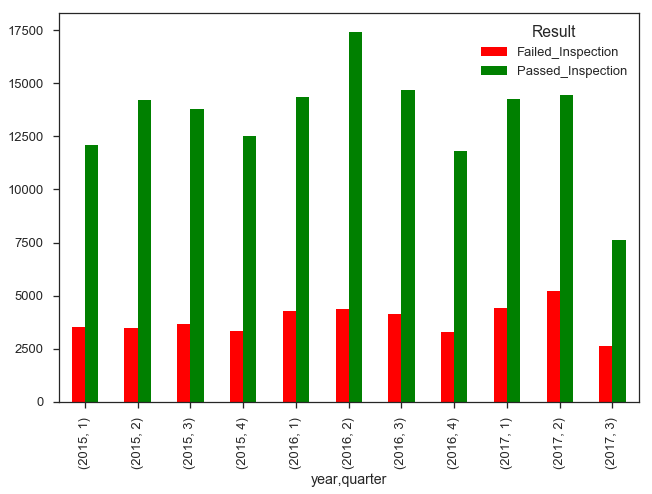

In [133]:
# Plotting the dataframe stored in data6
data6.plot( kind='bar', color=['r', 'g']) 


Interpretation of above chart (based upon data6)

- Output indicates Year 2016, Quarter 2 was the duration when there were maximum Passed Inspections.
- We should not consider Year 2017, Quarter 3 for our interpretation, as there might be not all inspection records updated in dataset.
- Total number of Passed as well as failed inspections do not show any major fluctuation over these 3 years.
- There is only slight dip in Year 2016, Quarter 4 inspections count in general, which might be due to holiday season. But similar dip is not seen in Year 2015, Quarter 4.

# Statistics Questions

In below section, we are trying to analyze some relationships between various attributes. We have conducted some correlation & significance testing to understand more about our data attributes.

Below are the Statistics question, which we will answer below:

Statistics Ques 1: Is there any relationship between Borough & the inspection result? We will perform chi square test to answer this.

Statistics Ques 2: Does industry and inspection result have any correlation? We will perform correlation & linear regression to answer this.

Statistics Ques 3 : Does the Inspection result in 2 specific Boroughs differ? We will perform t test to answer this.


Statistics Question 1: If there is any relationship between Borough & the inspection result.

It involves two Categorical Variables (for chi-squared test): Borough, Inspection result (of Fail/Pass)

Null Hypo (H0): There is no relation between Borough & Inspection result.

Alternative Hypo (H1): There is significant relationship between Borough & Inspection result.


In [134]:
import scipy.stats

In [135]:
stats1 = pd.crosstab(data3['Result'],data3['Borough'])
print(stats1)

Borough                 bronx  brooklyn  manhattan  outside nyc  queens  \
Result                                                                    
Failed_Inspection        6657     14201      10798          283    8881   
Inspection_in_progress     29        88         46            0      54   
Inspection_on_hold       3760      7809       6341            0    4894   
Passed_Inspection       21680     45920      34787          505   38567   
Warning_Issued            603       929       1116            0     624   

Borough                 staten island  
Result                                 
Failed_Inspection                1600  
Inspection_in_progress              8  
Inspection_on_hold                680  
Passed_Inspection                5796  
Warning_Issued                     99  


In [136]:
stats1.drop('Inspection_in_progress', axis=0, inplace=True)
stats1.drop('Inspection_on_hold', axis=0, inplace=True)
stats1.drop('Warning_Issued', axis=0, inplace=True)
stats1.drop('outside nyc', axis=1, inplace=True)

In [137]:
stats1
# In below table, borough is explanatory variable, inspection_result is target variable.
# Below table shows that 6657 inspections conducted in Bronx got Failed_inspection, while 21680 got Passed_inspection.

Borough,bronx,brooklyn,manhattan,queens,staten island
Result,,,,,
Failed_Inspection,6657,14201,10798,8881,1600
Passed_Inspection,21680,45920,34787,38567,5796


In [138]:
# column percentages
colsum = stats1.sum(axis =0)
colpct = stats1/colsum
print(colpct)
# In below table, we see that failed & passed inspection percentage are almost similar in each borough, except queens (with 5% more variation).
# If output is set in a manner, that explanatory variables across the top of the table, & the response variables down the side, we will interpret column %.

Borough               bronx  brooklyn  manhattan    queens  staten island
Result                                                                   
Failed_Inspection  0.234923  0.236207   0.236876  0.187173       0.216333
Passed_Inspection  0.765077  0.763793   0.763124  0.812827       0.783667


In [139]:
print('chi-square value, p value, expected counts')
stats1_results = scipy.stats.chi2_contingency(stats1)
print(stats1_results)

chi-square value, p value, expected counts
(487.67283998667585, 3.1050194892528857e-104, 4, array([[  6321.43116784,  13411.82070232,  10169.12304711,  10584.72195545,
          1649.90312727],
       [ 22015.56883216,  46709.17929768,  35415.87695289,  36863.27804455,
          5746.09687273]]))


Interpreting the results of chi-square test, p value & expected counts.
- Chi-square value of 487.67 is high.
- P value with e-104 means it is very low,indicating close to zero. Such a low value of p indicates that we can reject null hypothesis.
- Thus, there is a significant relationship between Borough & Inspection results. 

Statistics Question 2 : Does industry and inspection result have any correlation? Also, can we use any independent variable to predict inspection result?

We will perform correlation test involving 2 continuous variable.

Industry : Currently in Categorical, will convert it into continuous using Label encode feature.

Inspection result : Currently in Categorical, will convert it into binary using Label encode feature.

Null hypo -> Ho : There is no relationship between Industry type & Inspection result.

Alternative hypo -> H1 : There is relationship between Industry type & inspection result.

In [140]:
print(data3.dtypes)

Recid        object
Certno       object
Inspdate     object
Result       object
Industry     object
             ...   
city         object
State        object
Zip         float64
year          int64
quarter       int64
Length: 11, dtype: object


In [141]:
data3.head()

,Recid,Certno,Inspdate,Result,Industry,Borough,city,State,Zip,year,quarter
0,60662-2016-ENFO,09346560,09/14/2016,Passed_Inspection,Tobacco,manhattan,new york,NY,10128.0,2016,3
1,78126-2016-ENFO,03060844,12/12/2016,Passed_Inspection,Retail-Household Goods,manhattan,new york,NY,10037.0,2016,4
2,30123-2016-ENFO,03056722,05/05/2016,Passed_Inspection,Retail-Household Goods,brooklyn,brooklyn,NY,11219.0,2016,2
3,78072-2016-ENFO,09364759,12/08/2016,Passed_Inspection,Tobacco,brooklyn,brooklyn,NY,11203.0,2016,4
4,77311-2016-ENFO,03058657,12/07/2016,Passed_Inspection,Retail-Household Goods,brooklyn,brooklyn,NY,11210.0,2016,4


In [142]:
stats2=data3
stats2.head()

,Recid,Certno,Inspdate,Result,Industry,Borough,city,State,Zip,year,quarter
0,60662-2016-ENFO,09346560,09/14/2016,Passed_Inspection,Tobacco,manhattan,new york,NY,10128.0,2016,3
1,78126-2016-ENFO,03060844,12/12/2016,Passed_Inspection,Retail-Household Goods,manhattan,new york,NY,10037.0,2016,4
2,30123-2016-ENFO,03056722,05/05/2016,Passed_Inspection,Retail-Household Goods,brooklyn,brooklyn,NY,11219.0,2016,2
3,78072-2016-ENFO,09364759,12/08/2016,Passed_Inspection,Tobacco,brooklyn,brooklyn,NY,11203.0,2016,4
4,77311-2016-ENFO,03058657,12/07/2016,Passed_Inspection,Retail-Household Goods,brooklyn,brooklyn,NY,11210.0,2016,4


In [143]:
# Creating mapping for Result column
Result_code= {"Passed_Inspection": 1, "Failed_Inspection": 0,"Inspection_on_hold":2,"Warning_Issued":3,"Inspection_in_progress":4}

# Assigning the mapping to Result column:
stats2 = stats2.replace({"Result": Result_code})
stats2.head()

,Recid,Certno,Inspdate,Result,Industry,Borough,city,State,Zip,year,quarter
0,60662-2016-ENFO,09346560,09/14/2016,1,Tobacco,manhattan,new york,NY,10128.0,2016,3
1,78126-2016-ENFO,03060844,12/12/2016,1,Retail-Household Goods,manhattan,new york,NY,10037.0,2016,4
2,30123-2016-ENFO,03056722,05/05/2016,1,Retail-Household Goods,brooklyn,brooklyn,NY,11219.0,2016,2
3,78072-2016-ENFO,09364759,12/08/2016,1,Tobacco,brooklyn,brooklyn,NY,11203.0,2016,4
4,77311-2016-ENFO,03058657,12/07/2016,1,Retail-Household Goods,brooklyn,brooklyn,NY,11210.0,2016,4


In [144]:
stats5=stats2 # We need this variable for our Statistics Q3.
stats5.head()

,Recid,Certno,Inspdate,Result,Industry,Borough,city,State,Zip,year,quarter
0,60662-2016-ENFO,09346560,09/14/2016,1,Tobacco,manhattan,new york,NY,10128.0,2016,3
1,78126-2016-ENFO,03060844,12/12/2016,1,Retail-Household Goods,manhattan,new york,NY,10037.0,2016,4
2,30123-2016-ENFO,03056722,05/05/2016,1,Retail-Household Goods,brooklyn,brooklyn,NY,11219.0,2016,2
3,78072-2016-ENFO,09364759,12/08/2016,1,Tobacco,brooklyn,brooklyn,NY,11203.0,2016,4
4,77311-2016-ENFO,03058657,12/07/2016,1,Retail-Household Goods,brooklyn,brooklyn,NY,11210.0,2016,4


Using Replace function by first mapping each categorical value to a number
We will map each value in a column to a number. 
For example, the Industry column contains 12 different values. We could choose to map it like this:


Consultancy and Advisory Services -> 1

Entertainment -> 2

Home Appliances and Improvement -> 3

Laundry/Dry-cleaning service -> 4

Miscellaneous -> 5

Personal Grooming -> 6

Restaurants and Cafes -> 7

Retail-Household Goods -> 8

Sidewalk business -> 9

Speciality Stores -> 10

Tobacco -> 11

Auto -> 12

In [145]:
# Creating mapping for Industry column
dictionary_Industry_code= {"Consultancy and Advisory Services": 1, "Entertainment": 2, "Home Appliances and Improvement":3,
        "Laundry/Dry-cleaning service":4,"Miscellaneous":5,"Personal Grooming":6,"Restaurants and Cafes":7,
        "Retail-Household Goods":8,"Sidewalk business":9,"Speciality Stores":10,"Tobacco":11,"Auto":12}

# Assigning the mapping to Industry column:
stats2 = stats2.replace({"Industry": dictionary_Industry_code})


In [146]:
# Creating mapping for Borough column
Borough_code= {"bronx": 0, "brooklyn": 1, "manhattan":2,"outside nyc":3, "queens":4, "staten island":5}

# Assigning the mapping to Result column:
stats2 = stats2.replace({"Borough": Borough_code})

In [147]:
stats5.head()

,Recid,Certno,Inspdate,Result,Industry,Borough,city,State,Zip,year,quarter
0,60662-2016-ENFO,09346560,09/14/2016,1,Tobacco,manhattan,new york,NY,10128.0,2016,3
1,78126-2016-ENFO,03060844,12/12/2016,1,Retail-Household Goods,manhattan,new york,NY,10037.0,2016,4
2,30123-2016-ENFO,03056722,05/05/2016,1,Retail-Household Goods,brooklyn,brooklyn,NY,11219.0,2016,2
3,78072-2016-ENFO,09364759,12/08/2016,1,Tobacco,brooklyn,brooklyn,NY,11203.0,2016,4
4,77311-2016-ENFO,03058657,12/07/2016,1,Retail-Household Goods,brooklyn,brooklyn,NY,11210.0,2016,4


In [148]:
print(stats2.dtypes)

Recid        object
Certno       object
Inspdate     object
Result        int64
Industry      int64
             ...   
city         object
State        object
Zip         float64
year          int64
quarter       int64
Length: 11, dtype: object


In [149]:
stats2['Industry'].corr(stats2['Result'])
# This shows there is very low negative correlation (almost negligible) between Industry type & Inspection result

-0.049322947655379659

Quick note on correlation & Linear regression : Correlation is done on continuous variables. In this case, though we have converted Industry & Result into numeric numbers, but they are still more or less like ordinal attributes.Since these attributes are not true continuous variable, these & below calculated correlation numbers dont seem to make much sense.  

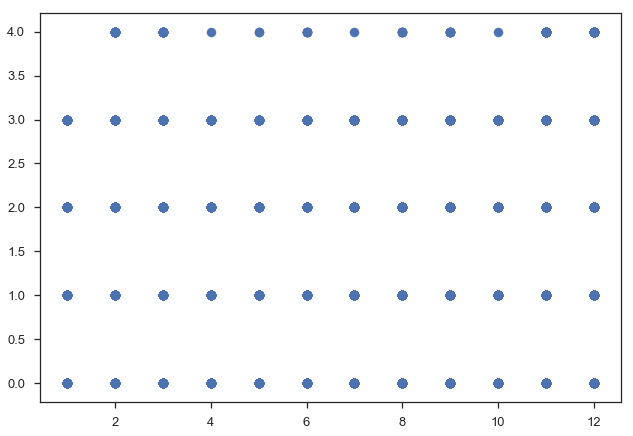

In [150]:
plt.scatter(stats2['Industry'], stats2['Result'])
plt.show() # scatter plot also indicates almost no correlation.

In [151]:
# Correlation matrix for all columns
stats2.corr() # This indicates that Result & Industry has a negative correlation of 0.05 which is very low to establish
              # relationship between Industry type & Inspection result.
# Also the output shows very low correlation between quarter & Inspection result (0.01). 
# Thus, this indicates that Industry type or quarter of an year doesnt cause/impact Inspection result of pass/fail.  

,Result,Industry,Borough,Zip,year,quarter
Result,1.000000,-0.049323,-0.001079,-0.011608,-0.024619,0.010564
Industry,-0.049323,1.000000,-0.024950,-0.009738,0.004553,-0.003858
Borough,-0.001079,-0.024950,1.000000,0.157402,0.008971,-0.013262
Zip,-0.011608,-0.009738,0.157402,1.000000,-0.005450,-0.013799
year,-0.024619,0.004553,0.008971,-0.005450,1.000000,-0.239781
quarter,0.010564,-0.003858,-0.013262,-0.013799,-0.239781,1.000000


In [152]:
stats4=stats2
stats4.head()
del stats4['year']
del stats4['Recid']
del stats4['Inspdate']
del stats4['city']
del stats4['State']
del stats4['Zip']
stats4.head()


,Certno,Result,Industry,Borough,quarter
0,09346560,1,11,2,3
1,03060844,1,8,2,4
2,03056722,1,8,1,2
3,09364759,1,11,1,4
4,03058657,1,8,1,4


In [153]:
stats4.corr() # Based these correlation results, it reflects low correlation between Borough & Inspection result, 
              # which we concluded to be significant when we used chi-square test above.


,Result,Industry,Borough,quarter
Result,1.000000,-0.049323,-0.001079,0.010564
Industry,-0.049323,1.000000,-0.024950,-0.003858
Borough,-0.001079,-0.024950,1.000000,-0.013262
quarter,0.010564,-0.003858,-0.013262,1.000000


Creating a linear regression model to see, if any of these independent variables like Borough, Industry can be used to predict the value (result) of Inspection.

Thus, x would be Borough, Industry type,quarter.

Y would be Inspection result.

For linear regression, our dependent variable should be continuous variable, which in our case is obtained by coding 'Inspection result' to 'numeric numbers'. These again as pointed out in Correlation, are more like ordinal attributes, thus though the methodology used below is correct, but the kind of attributes is not. We have still done this regression analysis to see if Inspection result would have been a continuous variable, how its significance would have been tested.

In [154]:
import statsmodels.formula.api as smf # Importing api

# Regressing Borough to predict Result
lm=smf.ols(formula='Result~Borough',data=stats4).fit()
print(lm.params) # Borough coefficient has very low value, indicating it cannot be used to predict Inspection result.
print(lm.rsquared) # Output has close to 0% value, indicating that knowing Borough doesnt help in predicting Inspection result.
                    # Thus, this is not a good model.

Intercept    0.947731
Borough     -0.000440
dtype: float64
1.16449581467e-06


In [155]:
import statsmodels.formula.api as smf

# Regressing Industry to predict Result
lm=smf.ols(formula='Result~Industry',data=stats4).fit()
print(lm.params) # Output indicates Industry has -0.01 coefficient, thus knowing Industry type doesnt help in predicting Inspection result. 
print(lm.rsquared) # Output indicates only 2% of the variance can be explained by Industry attribute, which is almost negligible.
                    # Thus, this is not a good model.

Intercept    1.029459
Industry    -0.010165
dtype: float64
0.00243275316541


In [156]:
import statsmodels.formula.api as smf

# Regressing quarter to predict Result
lm=smf.ols(formula='Result~quarter',data=stats4).fit() 
print(lm.params) # quarter coefficient has very low value, indicating it cannot be used to predict Inspection result.
print(lm.rsquared) # R squared value is very low, indicating quarter cannot be used to explain the variance in our prediction.
                    # Thus, not a good model.

Intercept    0.932731
quarter      0.006163
dtype: float64
0.000111594099608


Statistics Question 3 : We are testing for difference across populations. In this case, we are trying to find if the Inspection result in 2 specific Borough differ.

To check this, we will perform t test, where we will take 2 Borough types as our Independent categorical variable & Inspection result as our dependent variable.

These t test & p value numbers would have made sense, if we had some true continuous values for our Inspection result, the way we have for Salary, Revenue etc. 
Since in this case, we have converted our categorical values of Inspection result into continuous using dictionary, the means are not making great sense. As explained earlier, we are doing these test, to show the approach, had our 2 variables been true continuous variables.

Null Hypothesis, H0 : There is no significant difference between Inspection result of two borough.

Alternative Hypothesis, H1 : There exists significant difference between Inspection result of two borough.

In [157]:
stats5.head()

,Recid,Certno,Inspdate,Result,Industry,Borough,city,State,Zip,year,quarter
0,60662-2016-ENFO,09346560,09/14/2016,1,Tobacco,manhattan,new york,NY,10128.0,2016,3
1,78126-2016-ENFO,03060844,12/12/2016,1,Retail-Household Goods,manhattan,new york,NY,10037.0,2016,4
2,30123-2016-ENFO,03056722,05/05/2016,1,Retail-Household Goods,brooklyn,brooklyn,NY,11219.0,2016,2
3,78072-2016-ENFO,09364759,12/08/2016,1,Tobacco,brooklyn,brooklyn,NY,11203.0,2016,4
4,77311-2016-ENFO,03058657,12/07/2016,1,Retail-Household Goods,brooklyn,brooklyn,NY,11210.0,2016,4


In [158]:
# Splitting stats5 on values of categorical variables (which are Borough in this case).
# Also, below code gives us mean Inspection result for each Borough.

groupby_Borough = stats5.groupby('Borough')
for Borough, value in groupby_Borough['Result']:
     print((Borough, value.mean()))


('bronx', 0.9509914754499068)
('brooklyn', 0.9380683713577096)
('manhattan', 0.9606879144062689)
('outside nyc', 0.6408629441624365)
('queens', 0.9513956997359487)
('staten island', 0.9147012098252475)


In [159]:
# We are creating sample for each borough with their Inspection result.
from scipy.stats import ttest_ind

manhattan_Result = stats5[stats5['Borough'] =='manhattan']['Result']
bronx_Result = stats5[stats5['Borough'] =='bronx']['Result']
brooklyn_Result = stats5[stats5['Borough'] =='brooklyn']['Result']
outside_nyc_Result = stats5[stats5['Borough'] =='outside nyc']['Result']
queens_Result = stats5[stats5['Borough'] =='queens']['Result']
staten_island_Result = stats5[stats5['Borough'] =='staten island']['Result']



In [160]:
# Checking if mean inspection result of Manhattan & Bronx borough differ significantly or not. 
import scipy.stats
from scipy.stats import ttest_ind
scipy.stats.ttest_ind(manhattan_Result, bronx_Result)

# Looking at a low t value of 2.16 & p value less than 0.05, we will reject null hypothesis & conclude that significant difference exists in their mean 

Ttest_indResult(statistic=2.1620755766122706, pvalue=0.030615105813715206)

In [161]:
# Checking if mean inspection result of Brooklyn & Queens borough differ significantly or not. 
scipy.stats.ttest_ind(brooklyn_Result, queens_Result)

# Looking at a negative t value & p value close to zero, we will reject null hypothesis & conclude that significant difference exists in their mean 

Ttest_indResult(statistic=-3.8910146601099984, pvalue=9.9878877157253836e-05)